In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

     

In [2]:
df_00 = pd.read_csv("dataset-of-00s.csv")
df_10 = pd.read_csv("dataset-of-10s.csv")
df_60 = pd.read_csv("dataset-of-60s.csv")
df_70 = pd.read_csv("dataset-of-70s.csv")
df_80 = pd.read_csv("dataset-of-80s.csv")
df_90 = pd.read_csv("dataset-of-90s.csv")

In [3]:
df = pd.concat([df_00, df_10, df_60, df_70, df_80, df_90])


In [4]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [5]:
df.isnull().sum()


track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [6]:
df['time_signature'].describe()


count    41106.000000
mean         3.893689
std          0.423073
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64

In [7]:
df = df.drop(axis=1, labels='time_signature')
#Removing the time_signature column because most of the values are 4.

In [8]:
df['loudness'].describe()


count    41106.000000
mean       -10.221525
std          5.311626
min        -49.253000
25%        -12.816000
50%         -9.257000
75%         -6.374250
max          3.744000
Name: loudness, dtype: float64

In [9]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df_X = df.iloc[:,3:17]


df_scaled = scale.fit_transform(df_X)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_X.columns
df_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,sections
0,0.215416,-0.429668,-0.343315,0.555679,0.665030,-0.511673,0.011220,-0.508740,-0.245926,-0.039055,0.471597,-0.320853,-0.485415,0.518152
1,0.924004,1.086412,1.354030,0.893245,-1.503691,1.277886,-1.020031,-0.508740,-0.309525,0.544503,-0.905554,0.064804,0.073928,-0.097638
2,-2.124046,1.015160,1.071139,1.357892,0.665030,-0.297994,-1.074290,-0.493684,-0.159199,-0.906910,-1.112575,0.874330,1.327148,0.518152
3,-1.977830,1.640592,-0.343315,1.219326,0.665030,1.080465,-1.074596,-0.250443,-0.055127,-0.783465,1.000112,0.174751,0.972847,-0.302901
4,0.507849,0.730153,-0.909096,1.104859,0.665030,-0.527931,-0.003533,-0.508740,-0.442506,0.331280,-0.248819,-0.345625,-0.919860,-0.097638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,-0.808099,0.852864,1.071139,0.781602,-1.503691,1.870147,-1.071880,-0.508052,-0.112945,0.821319,1.154862,-1.284154,-0.513802,-0.918691
41102,0.457236,0.298684,1.071139,0.741877,-1.503691,-0.488447,-0.925315,-0.488116,-0.623476,0.551984,0.509605,-0.195220,-0.274186,-0.097638
41103,0.125437,-1.051141,1.354030,-0.939738,-1.503691,-0.501221,0.223667,-0.508704,-0.552360,0.106835,1.632688,-0.378684,-0.999112,-0.097638
41104,0.462860,0.797446,0.505358,0.779719,0.665030,-0.419930,-1.074320,1.978688,1.049193,-1.228615,0.024494,0.800023,0.369873,0.107625


In [10]:
df['loudness'].describe()


count    41106.000000
mean       -10.221525
std          5.311626
min        -49.253000
25%        -12.816000
50%         -9.257000
75%         -6.374250
max          3.744000
Name: loudness, dtype: float64

In [11]:

df_clean= df_scaled
for col in df_clean.columns:
  q1=df_clean[col].quantile(0.25)
  q3=df_clean[col].quantile(0.75)
  inq=q3-q1
  filter=(df_clean[col] >= q1-1.5*inq) & (df_clean[col] <= q3+1.5*inq)
  df_clean[col] = df_clean[col].loc[filter]
#Removing outliers

In [12]:
#number of outliers for each predictor
df_clean.isna().sum()

danceability           1
energy                 0
key                    0
loudness            1343
mode                   0
speechiness         5088
acousticness           0
instrumentalness    8920
liveness            2688
valence                0
tempo                434
duration_ms         1987
chorus_hit          1839
sections            1570
dtype: int64

In [13]:
#removing 2 predictors
df_clean = df_clean.drop(axis=1, labels=['speechiness', 'instrumentalness'])

In [14]:
df_remove = df_clean.dropna()
#Removing missing values
df_remove.shape
#The number of songs remaining is 33401

(33401, 12)

In [15]:
df_merge = df.iloc[df_remove.index]
df_merge = df_merge.drop(axis=1, labels=['speechiness', 'instrumentalness'])
df_merge.columns
#Removed the predictors that were not used from the original dataset

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'chorus_hit', 'sections', 'target'],
      dtype='object')

In [16]:
df_merge.head()

,track,artist,uri,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.368000,0.159,0.532,133.061,196707,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.018500,0.148,0.688,92.988,242587,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.000111,0.174,0.300,86.964,338893,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.000007,0.192,0.333,148.440,255667,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.363000,0.125,0.631,112.098,193760,22.62384,10,1


In [17]:
#observations in each class
df_merge.groupby('target')[['danceability', 'energy', 'key', 'loudness',
       'mode', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'chorus_hit', 'sections']].count()

,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,sections
target,,,,,,,,,,,,
0,15247,15247,15247,15247,15247,15247,15247,15247,15247,15247,15247,15247
1,18154,18154,18154,18154,18154,18154,18154,18154,18154,18154,18154,18154


In [19]:
df_merge.iloc[:,3:15]
#creating final scaled data with all the variables
scale = StandardScaler()
scale_X = scale.fit_transform(df_merge.iloc[:,3:15])
df_merge.iloc[:,3:15] = scale_X

In [20]:
df_merge


,track,artist,uri,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.118486,-0.518795,-0.339478,0.535085,0.651748,0.072572,-0.076165,-0.126019,0.495782,-0.315094,-0.479443,1.088622,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.861614,1.100931,1.356353,0.957657,-1.534336,-0.997974,-0.181124,0.478866,-0.953376,0.405103,0.308361,0.031727,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,-2.335015,1.024808,1.073715,1.539313,0.651748,-1.054301,0.066960,-1.025591,-1.171222,1.916857,2.073455,1.088622,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,-2.181672,1.692998,-0.339478,1.365853,0.651748,-1.054618,0.238710,-0.897635,1.051932,0.610425,1.574441,-0.320571,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.425174,0.720316,-0.904754,1.222560,0.651748,0.057257,-0.400582,0.257851,-0.262302,-0.361354,-1.091335,0.031727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,(You're A) Go Nowhere,Reagan Youth,spotify:track:4e86fqSFhqRQk3Z9hm7XHt,-0.954921,0.851417,1.073715,0.817900,-1.534336,-1.051798,0.143293,0.765799,1.214773,-2.114016,-0.519424,-1.377467,0
5516,La Fiebre de Norma,La Castañeda,spotify:track:43DFcnOZprnVlAFKwgBJ3e,0.372093,0.259350,1.073715,0.768171,-1.534336,-0.899649,-0.699237,0.486621,0.535778,-0.080480,-0.181938,0.031727,0
5517,Good Times,Edie Brickell,spotify:track:6UPfnVoOq3y3BvapBIKs8J,0.024120,-1.182755,1.356353,-1.336912,-1.534336,0.293114,-0.581874,0.025203,1.717583,-0.423092,-1.202957,0.031727,1
5518,Inane,KMFDM,spotify:track:2Ao3Wi4raEOQfKQiU9EU8y,0.377991,0.792210,0.508438,0.815543,0.651748,-1.054332,2.061170,-1.359053,0.025302,1.778092,0.725184,0.384025,0


In [21]:
X = df_merge.iloc[:,3:15]
X.shape

(33401, 12)

In [22]:
y = df_merge['target']
y.shape

(33401,)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26720, 12) (6681, 12) (26720,) (6681,)


In [24]:
X_train_final, X_valid, y_train_final, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(X_train_final)

      danceability    energy       key  loudness      mode  acousticness  \
4293     -0.064347  1.007892 -0.339478  1.524700  0.651748      0.133834   
1764     -0.347443  1.646478 -0.904754  1.164583  0.651748     -0.775594   
5740      0.372093  0.483490  1.638992  1.050279  0.651748     -1.025205   
5845     -1.403157 -0.616063  1.073715  0.177796  0.651748     -0.108150   
8182     -0.813373 -1.385750  1.073715 -0.540789  0.651748      1.582670   
...            ...       ...       ...       ...       ...           ...   
3864     -1.379565 -0.937471 -0.339478 -0.849293 -1.534336     -0.729955   
7255      0.147975  0.796439 -1.187393  1.124518  0.651748     -0.334817   
5487      1.392419 -0.704873  1.638992 -1.402667  0.651748     -0.031573   
2093      1.244973  1.287009 -1.187393  0.045580  0.651748     -0.699324   
5566      0.006427  1.274322  1.356353  1.005029  0.651748     -0.891379   

      liveness   valence     tempo  duration_ms  chorus_hit  sections  
4293 -0.553249 

Implemented logistic regression

In [25]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = X.shape[0]
    h = sigmoid(np.dot(X, weights))
    epsilon = 1e-5  # to prevent log(0)
    cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def compute_gradient(X, y, weights):
    m = X.shape[0]
    h = sigmoid(np.dot(X, weights))
    gradient = np.dot(X.T, (h - y)) / m
    return gradient

def gradient_descent(X, y, weights, learning_rate, iterations):
    costs = []
    for i in range(iterations):
        weights = weights - learning_rate * compute_gradient(X, y, weights)
        costs.append(compute_cost(X, y, weights))
    return weights, costs

def predict(X, weights):
    y_pred = sigmoid(np.dot(X, weights))
    return [1 if i > 0.5 else 0 for i in y_pred]



In [26]:
# Add intercept term to X
X_train_with_intercept = np.hstack((np.ones((X_train_final.shape[0], 1)), X_train_final))

# Initialize weights to zero
weights = np.zeros(X_train_with_intercept.shape[1])

# Set learning rate and number of iterations
learning_rate = 0.01
iterations = 1000

# Call the gradient descent function to learn the weights
weights, costs = gradient_descent(X_train_with_intercept, y_train_final, weights, learning_rate, iterations)



In [27]:
X_valid_with_intercept = np.hstack((np.ones((X_valid.shape[0], 1)), X_valid))
y_valid_pred = predict(X_valid_with_intercept, weights)
accuracy = np.mean(y_valid_pred == y_valid)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 66.89%


In [28]:
# Make predictions on the test set
X_test_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_test_pred = predict(X_test_with_intercept, weights)
accuracy = np.mean(y_test_pred == y_test)
print(f"Testing Accuracy: {accuracy * 100:.2f}%")

Testing Accuracy: 66.47%


In [29]:
print(np.unique(y_test, return_counts=True))
print(np.unique(y_test_pred, return_counts=True))


(array([0, 1], dtype=int64), array([3075, 3606], dtype=int64))
(array([0, 1]), array([2603, 4078], dtype=int64))


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:


def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate confusion matrix for the given true and predicted values.
    """
    K = len(np.unique(y_true))  # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(y_true)):
        result[y_true[i]][y_pred[i]] += 1

    return result

# Assume y_test and y_test_pred are the true labels and predicted labels from your test set
confusion_mat = calculate_confusion_matrix(y_test.values, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[1788. 1287.]
 [ 867. 2739.]]


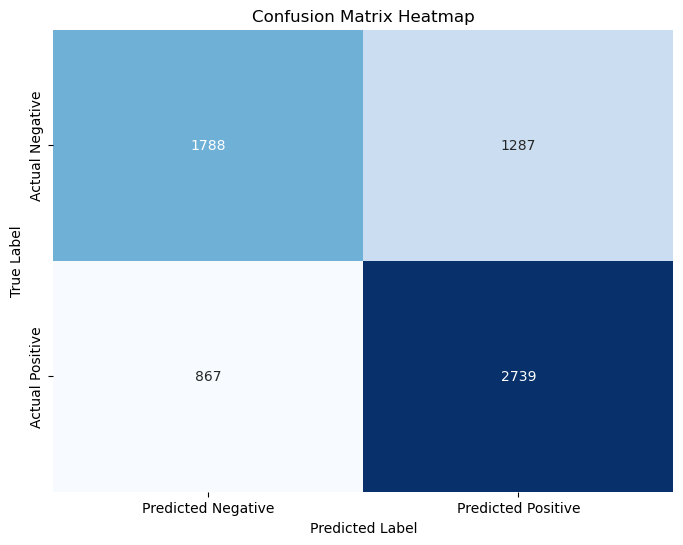

In [42]:
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


Testing logistic regression using Scikit learning

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_final, y_train_final)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Predicting the validation set results
y_valid_pred = model.predict(X_valid)

# Getting the classification report and confusion matrix
print(classification_report(y_valid, y_valid_pred))
print(confusion_matrix(y_valid, y_valid_pred))
# Predicting the test set results
y_test_pred = model.predict(X_test)

# Getting the classification report and confusion matrix for the test set
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# For the validation set
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Set Accuracy: {accuracy_valid * 100:.2f}%")

# For the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {accuracy_test * 100:.2f}%")



              precision    recall  f1-score   support

           0       0.66      0.59      0.62      3023
           1       0.69      0.75      0.72      3657

    accuracy                           0.68      6680
   macro avg       0.67      0.67      0.67      6680
weighted avg       0.67      0.68      0.67      6680

[[1787 1236]
 [ 930 2727]]
              precision    recall  f1-score   support

           0       0.67      0.58      0.62      3075
           1       0.68      0.76      0.72      3606

    accuracy                           0.68      6681
   macro avg       0.68      0.67      0.67      6681
weighted avg       0.68      0.68      0.67      6681

[[1788 1287]
 [ 867 2739]]
Validation Set Accuracy: 67.57%
Test Set Accuracy: 67.76%
